**Author: Fitria Dwi Wulandari (wulan391@sci.ui.ac.id) - January, 2020**

# Airline Passenger Satisfaction

Data source: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [37]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
# import dataset
df = pd.read_csv('train.csv', sep=',')
print('This dataset has %d rows dan %d columns.\n' % df.shape)
df.head()

This dataset has 103904 rows dan 25 columns.



Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied

1. `Gender`: Gender of the passengers (Female, Male)

1. `Customer Type`: The customer type (Loyal customer, disloyal customer)

1. `Age`: The actual age of the passengers

1. `Type of Travel`: Purpose of the flight of the passengers (Personal Travel, Business Travel)

1. `Class`: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

1. `Flight distance`: The flight distance of this journey

1. `Inflight wifi service`: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

1. `Departure/Arrival time convenient`: Satisfaction level of Departure/Arrival time convenient

1. `Ease of Online booking`: Satisfaction level of online booking

1. `Gate location`: Satisfaction level of Gate location

1. `Food and drink`: Satisfaction level of Food and drink

1. `Online boarding`: Satisfaction level of online boarding

1. `Seat comfort`: Satisfaction level of Seat comfort

1. `Inflight entertainment`: Satisfaction level of inflight entertainment

1. `On-board service`: Satisfaction level of On-board service

1. `Leg room service`: Satisfaction level of Leg room service

1. `Baggage handling`: Satisfaction level of baggage handling

1. `Check-in service`: Satisfaction level of Check-in service

1. `Inflight service`: Satisfaction level of inflight service

1. `Cleanliness`: Satisfaction level of Cleanliness

1. `Departure Delay in Minutes`: Minutes delayed when departure

1. `Arrival Delay in Minutes`: Minutes delayed when Arrival

## Exploratory Data Analysis (EDA)

In [40]:
# columns in dataset
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### Drop Unnecessary Columns

In [41]:
df.drop(['Unnamed: 0','id'], axis = 1, inplace=True)
df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   
1                           1                       6.0   
2                           0                       0.0   
3                          11                       9.0   
4                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied

### Check Data Types

In [42]:
print('Data type before correction: \n')
df.info()

Data type before correction: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online b

In [43]:
# convert object to category types
df[["Gender","Customer Type","Type of Travel","Class","satisfaction"]] = df[["Gender","Customer Type","Type of Travel","Class","satisfaction"]].apply(lambda x: x.astype('category'))

In [44]:
print('Data type sfter correction: \n')
df.info()

Data type sfter correction: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  int64   
 7   Departure/Arrival time convenient  103904 non-null  int64   
 8   Ease of Online booking             103904 non-null  int64   
 9   Gate location                      103904 non-null  int64   
 10  Food and drink                     103904 non-null  int64   
 

### Visualization

#### The Distribution of Passenger who are Satisfied and Neutral/Dissatisfied

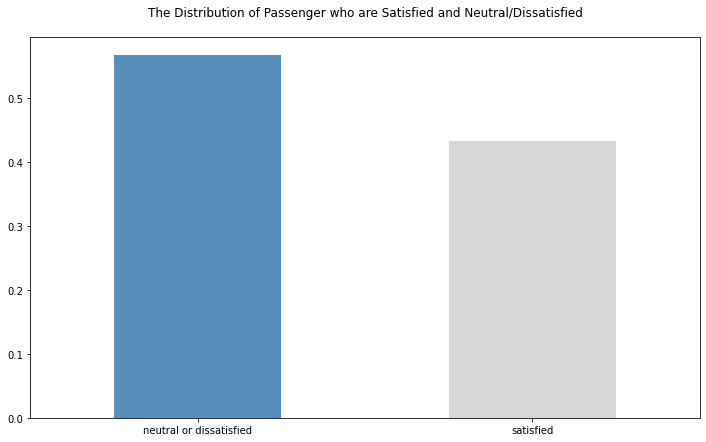

In [8]:
fig = plt.figure(figsize = (12,7))
df.satisfaction.value_counts(normalize=True).plot(kind='bar', color= ['steelblue','lightgrey'], alpha = 0.9, rot=0)
plt.title('The Distribution of Passenger who are Satisfied and Neutral/Dissatisfied\n')
plt.show()

The plot above shows a distribution of around **55% : 45%** between **neutral/dissatisfied** passengers and  **satisfied passengers**. So it can be said that the data is quite balanced.

#### Bivariat

##### Categorical Variables with Target Variable

**Categorical** Variable : Class, Customer Type, Type of Travel, and Gender

**Target** Variable : Satisfaction

In [9]:
# make a copy
train_df = df.copy()

In [10]:
train_df['satisfaction']=[1 if each=='satisfied 'else 0 for each in train_df.satisfaction]

In [11]:
# gender vs satisfaction
train_df[['Gender', 'satisfaction']].groupby(['Gender'],as_index=False).mean().sort_values(by='satisfaction',ascending=False)

Gender  satisfaction
0  Female           0.0
1    Male           0.0

Satisfaction rate of male passengers 44%, satification rate of female passengers 43%

In [13]:
# type of travel vs satisfaction
train_df[['Type of Travel', 'satisfaction']].groupby(['Type of Travel'],as_index=False).mean().sort_values(by='satisfaction',ascending=False)

Type of Travel  satisfaction
0  Business travel      0.582597
1  Personal Travel      0.101678

58% of business travel passengers are satisfied, and only 0.09% of personal travel passengers are satisfied.

In [14]:
# class vs satisfaction
train_df[['Class','satisfaction']].groupby(['Class'],as_index=False).mean().sort_values(by='satisfaction',ascending=False)

Class  satisfaction
0  Business      0.694251
2  Eco Plus      0.246064
1       Eco      0.186138

- 69% of business class passengers are satisfied, %24 of eco plus class passengers are satisfied, and %19 of eco class passengers are satisfied. 
- It is interesting that there is such a difference in satisfaction between eco and business.

In [15]:
# customer type vs satisfaction
train_df[['Customer Type','satisfaction']].groupby(['Customer Type'],as_index=False).mean().sort_values(by='satisfaction',ascending=False)

Customer Type  satisfaction
0     Loyal Customer      0.477291
1  disloyal Customer      0.236658

Loyal Customer most satisfied than disloyal customer. It can be seen that 47% of loyal customer are satisfied with the flight.

<AxesSubplot:title={'center':'Customer Satisfaction by Gender'}, xlabel='Gender', ylabel='count'>

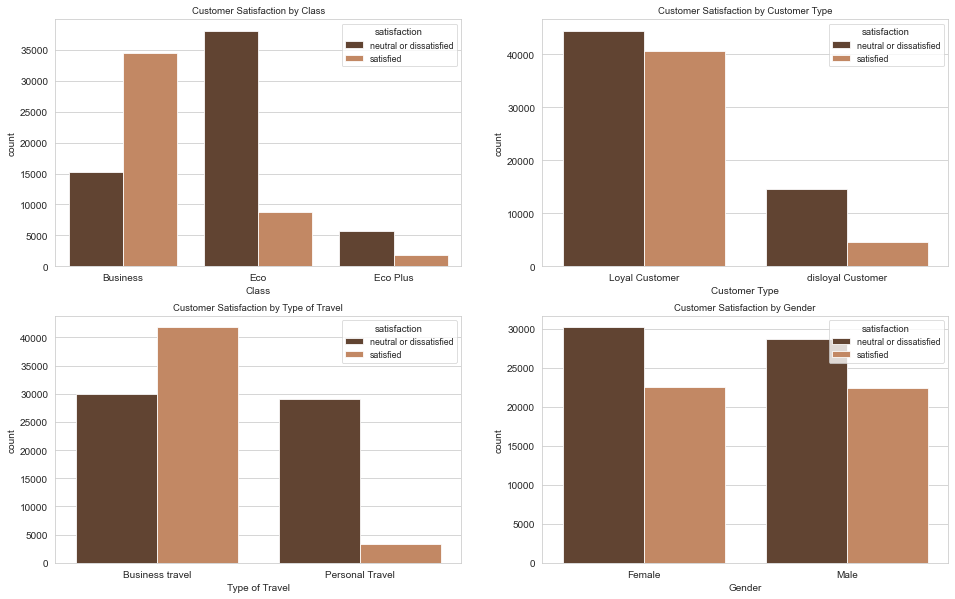

In [16]:
# visualization
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(16,10))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Customer Satisfaction by Class')
sns.countplot(x='Class', data = df, hue = 'satisfaction', palette = 'copper', ax=ax[0][0])

ax[0][1].set_title('Customer Satisfaction by Customer Type')
sns.countplot(x='Customer Type', data = df, hue = 'satisfaction', palette = 'copper', ax=ax[0][1])

ax[1][0].set_title('Customer Satisfaction by Type of Travel')
sns.countplot(x='Type of Travel', data = df, hue = 'satisfaction', palette = 'copper', ax=ax[1][0])

ax[1][1].set_title('Customer Satisfaction by Gender')
sns.countplot(x='Gender', data = df, hue = 'satisfaction', palette = 'copper', ax=ax[1][1])

**Class**: 
- Business class is generally satisfied with the flight.
- But, eco and eco plus class is generally neutral or dissatisfied with the flight.

**Customer Type**: 
- Loyal passengers are very high in number. Even among loyal passengers, the number of satisfied and neutral/dissatidfied passengers are almost same
- Disloyal customers are generally neutral or dissatisfied with the flight.

**Type of Travel**: 
- Business travel is generally satisfied with the flight.
- But, personal travel is generally (the majority of passenggers) neutral or dissatisfied with the flight.

**Gender**: 
- It is can be seen that gender-wise distribution of neutral/dissatisfied and satisfied passengers are quite same. 
- For both male and female passengers, the number of dissatisfied passengers are on the higher side compared to the number of satisfied passengers.

##### Age with Satisfaction (Target Variable)

In [20]:
# age vs satisfaction
train_df[['Age', 'satisfaction']].groupby(['Age'],as_index=False).mean().sort_values(by='satisfaction',ascending=False)

Age  satisfaction
34   41      0.607899
39   46      0.599819
44   51      0.597249
50   57      0.590102
45   52      0.586207
..  ...           ...
2     9      0.137283
63   70      0.136143
3    10      0.131772
1     8      0.107813
0     7      0.099644

[75 rows x 2 columns]

C:\Users\USER KEMENDIKBUD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER KEMENDIKBUD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


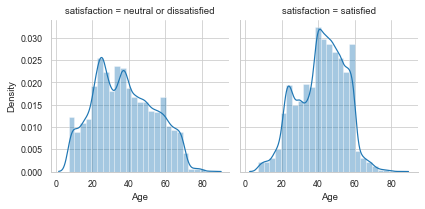

In [36]:
# visualization
g = sns.FacetGrid(df, col = 'satisfaction')
g.map(sns.distplot,'Age', bins=25)
plt.show()

It can be seen that:
- **0-20** years old is generally neutral or dissatisfied with the flight.
- **30-60** years old is generally satisfied with the flight.
- **65-80** years old passengers is neutral or dissatisfied.

#### Multivariat 

##### Type of Travel, Flight Distance, Class, and Satisfaction

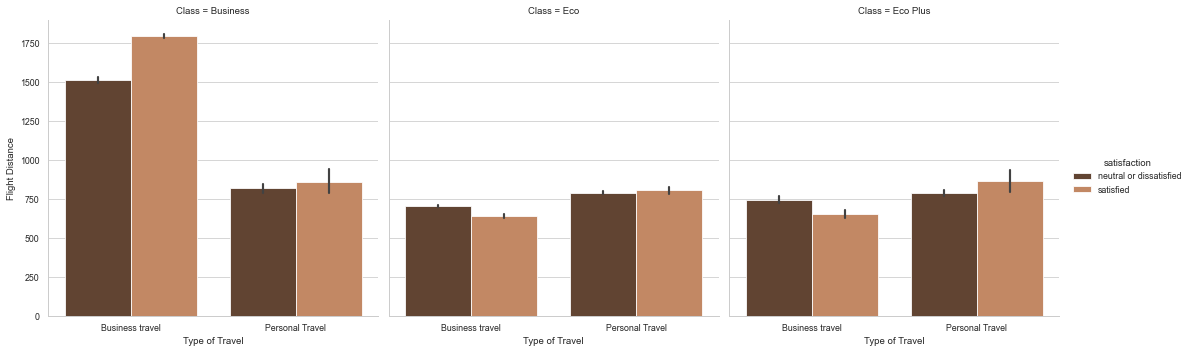

In [21]:
sns.catplot(x = 'Type of Travel',
            y = 'Flight Distance', 
            hue = 'satisfaction', 
            col = 'Class', 
            kind = 'bar', palette = 'copper',
            data = df)
plt.show()

**Type of Travel**, **Flight Distance**, and **Satisfaction** grouped by **Class**:
- For **Business Travel** in **Business class** category, the number of satisfied passengers is quite high for longer flight distances.
- For the other combinations, the number of satisfied and neutral/dissatisfied passengers is quite the same.

##### Online Boarding, Departure/Arrival Time Convenience, Class, and Satisfaction

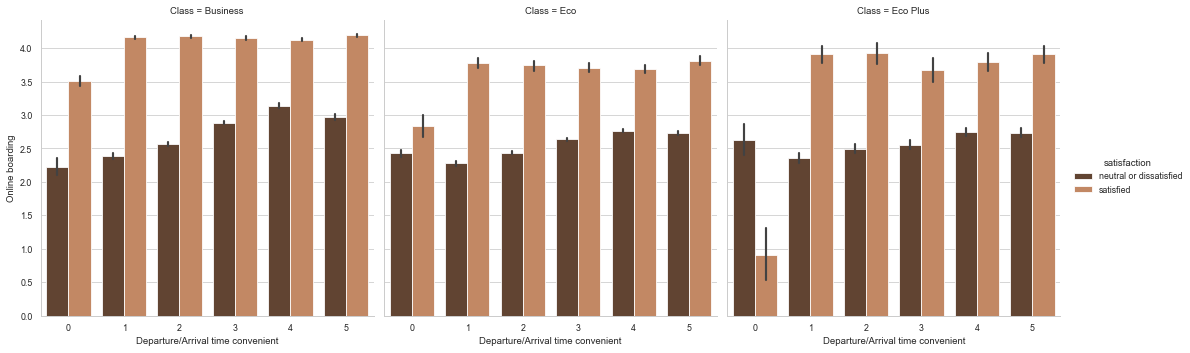

In [38]:
sns.catplot(x = 'Departure/Arrival time convenient',
            y = 'Online boarding', 
            hue = 'satisfaction', 
            col = 'Class', 
            kind = 'bar', palette = 'copper',
            data = df)
plt.show()

**Online Boarding**, **Departure/Arrival Time Convenience**, and **Satisfaction** grouped by **Class**: 
- For **Eco Plus** class, `Departure/Arrival_time_convenient` = 0 (very inconvenient) has really high number of neutral or dissatisfied passengers, even when online boarding is done very well. 
- For other combinations, the number of satisfied passengers are on the higher side compared to the number of neutral or dissatisfied passengers.

##### Departure Delay, Arrival Delay, Type of Travel,  and Satisfaction

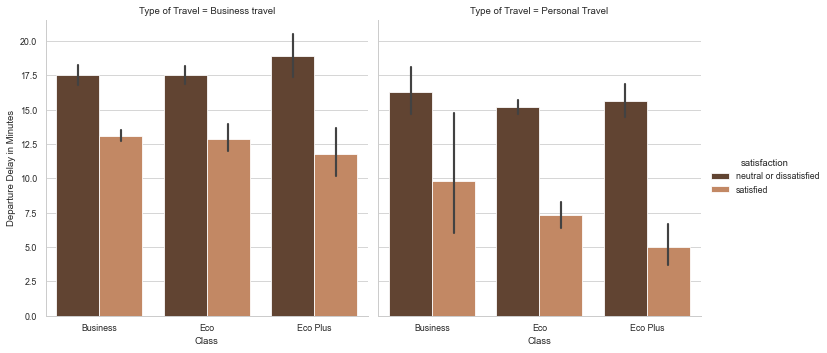

In [39]:
sns.catplot(x = 'Class',
            y = 'Departure Delay in Minutes', 
            hue = 'satisfaction', 
            col = 'Type of Travel', 
            kind = 'bar', palette = 'copper',
            data = df)
plt.show()

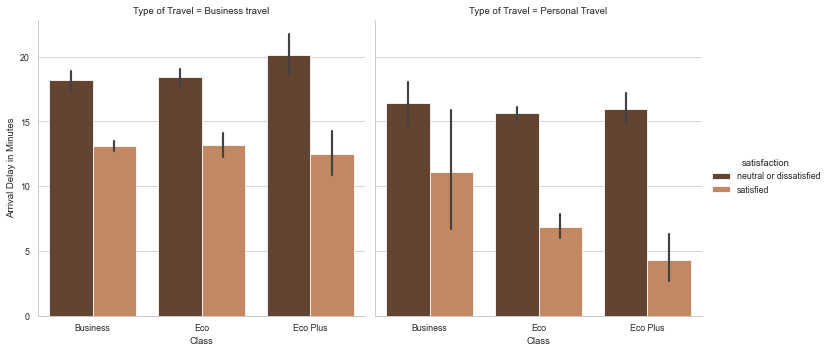

In [40]:
sns.catplot(x = 'Class',
            y = 'Arrival Delay in Minutes', 
            hue = 'satisfaction', 
            col = 'Type of Travel', 
            kind = 'bar', palette = 'copper',
            data = df)
plt.show()

**Departure Delay** or **Arrival Delay**, **Class**, and **Satisfaction** grouped by **Type of Travel**: 
- For **Personal Travel** (specially **Eco Plus** and **Eco** class), the number of neutral or dissatisfied passengers are really high when arrival delay in minutes is high.
- By minute comparison, all combinations have higher number of neutral or dissatisfied passengers compared to the number of satisfied passengers.

##### Baggage Handling, Gate Location, Class, and Satisfaction

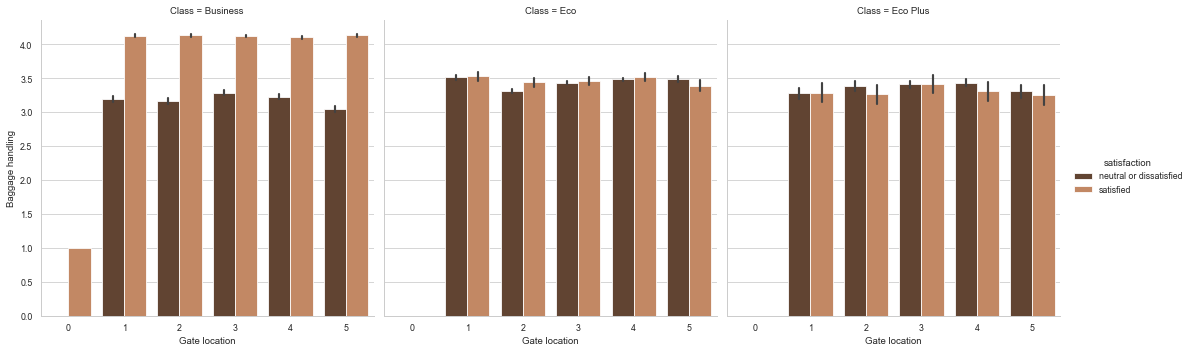

In [41]:
sns.catplot(x = 'Gate location',
            y = 'Baggage handling', 
            hue = 'satisfaction', 
            col = 'Class', 
            kind = 'bar', palette = 'copper',
            data = df)
plt.show()

**Baggage Handling**, **Gate Location**, and **Satisfaction** grouped by **Class**: 
- For **Business** class, it's can be seen that all gate locations have higher number of neutral or dissatisfied passengers when baggage handling is not done perfectly well (rating <= 4). 
- For **Eco Plus** class, when the gate location is 1, even when the baggages are handled in a moderate way (rating in range 2.0 - 4.0), passengers remained dissatisfied.
- And the same for **Eco** class, when the gate location is 2, even when the baggages are handled in a mediocre way (rating in range 2.0 - 4.0), passengers remained dissatisfied.

##### Inflight Entertainment, Inflight wi-fi, Class, and Satisfaction

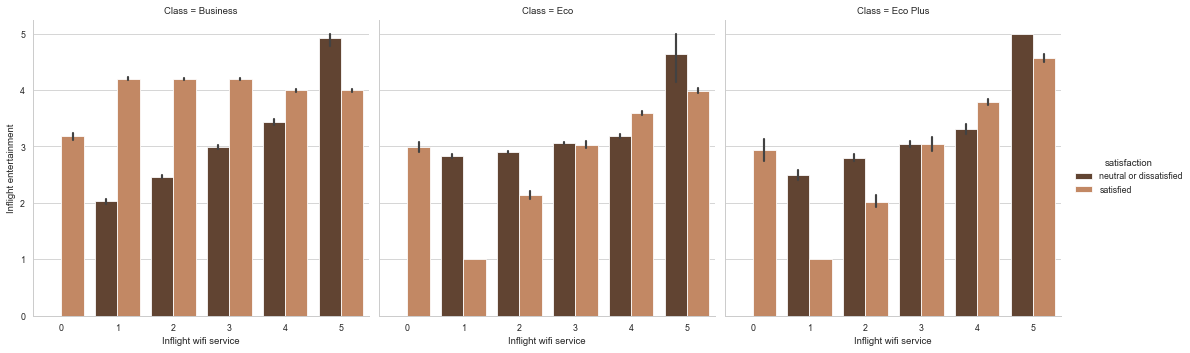

In [42]:
sns.catplot(x = 'Inflight wifi service',
            y = 'Inflight entertainment', 
            hue = 'satisfaction', 
            col = 'Class', 
            kind = 'bar', palette = 'copper',
            data = df)
plt.show()

**Inflight Entertainment**, **Inflight wi-fi Service**,  and **Class** grouped by **Class**: 
- For **Eco Plus** class, the majority of passengers are satisfied without in-flight wi-fi service (rating 0) and medium level of in-flight entertainment (rating 2 - 4). It's interesting.
- For **Business** class passengers, only highest level of in-flight entertainment (rating 5) can make them satisfied. 
- For **Eco** passengers, high level of in-flight entertainment (rating 3 - 5) and very high wi-fi service availability (rating 5) can make them satisfied.

#### Breakdown per Type of Travel

##### Satisfaction of Personal Travel

In [43]:
df_personal = df[df['Type of Travel'] == 'Personal Travel']
df_personal.head()

Gender   Customer Type  Age   Type of Travel     Class  Flight Distance  \
0     Male  Loyal Customer   13  Personal Travel  Eco Plus              460   
5   Female  Loyal Customer   26  Personal Travel       Eco             1180   
6     Male  Loyal Customer   47  Personal Travel       Eco             1276   
11  Female  Loyal Customer   12  Personal Travel  Eco Plus              308   
13    Male  Loyal Customer   33  Personal Travel       Eco              946   

    Inflight wifi service  Departure/Arrival time convenient  \
0                       3                                  4   
5                       3                                  4   
6                       2                                  4   
11                      2                                  4   
13                      4                                  2   

    Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                        3              1               5                3   
5                        2              1               1                2   
6                        2              3               2                2   
11                       2              2               1                2   
13                       4              3               4                4   

    Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0              5                       5                 4                 3   
5              1                       1                 3                 4   
6              2                       2                 3                 3   
11             1                       1                 1                 2   
13             4                       4                 4                 5   

    Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                  4                4                 5            5   
5                  4                4                 4            1   
6                  4                3                 5            2   
11                 5                5                 5            1   
13                 2                2                 2            4   

    Departure Delay in Minutes  Arrival Delay in Minutes  \
0                           25                      18.0   
5                            0                       0.0   
6                            9                      23.0   
11                           0                       0.0   
13                           0                       0.0   

               satisfaction  
0   neutral or dissatisfied  
5   neutral or dissatisfied  
6   neutral or dissatisfied  
11  neutral or dissatisfied  
13                satisfied

In [55]:
# for airline's service
def service_plot(variable):
    
    var=df_personal[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values, color = 'steelblue')
    plt.xlabel('Passengers Score')
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print('{}: \n {}'.format(variable,var_Value))

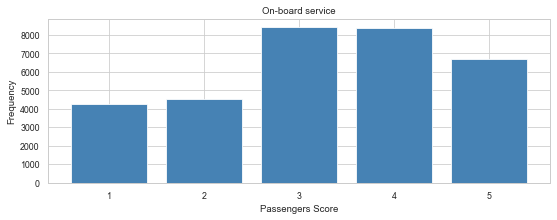

On-board service: 
 3    8422
4    8362
5    6721
2    4513
1    4231
Name: On-board service, dtype: int64


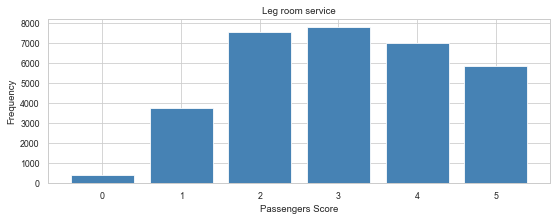

Leg room service: 
 3    7780
2    7529
4    6980
5    5853
1    3707
0     400
Name: Leg room service, dtype: int64


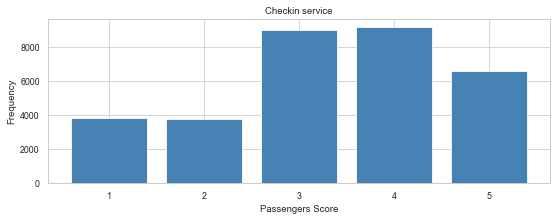

Checkin service: 
 4    9147
3    8976
5    6543
1    3818
2    3765
Name: Checkin service, dtype: int64


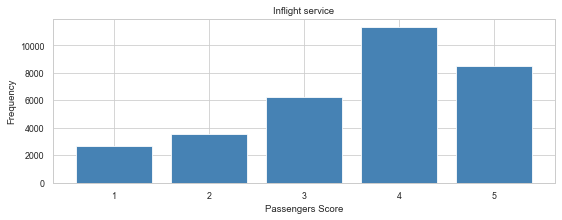

Inflight service: 
 4    11322
5     8481
3     6215
2     3554
1     2677
Name: Inflight service, dtype: int64


In [56]:
service = ['On-board service', 'Leg room service', 'Checkin service', 'Inflight service']

for c in service:
    service_plot(c)

It can be seen that:
- For **leg room service**, it can be seen that there are 400 passenger who do not rate this service (rating 0), and 11236 passengers who are not satisfied with this service (rating 1 - 2). So, it can be said that personal travel passengers are not satisfied with this service.
- For the others, there are lots of 1 and 2 points in on board service and checkin service.

In [57]:
# for airline's facilities
def eat_plot(variable):
    
    var=df_personal[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values, color = 'steelblue')
    
    plt.xlabel('Passengers Score')
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print('{}: \n {}'.format(variable,var_Value))

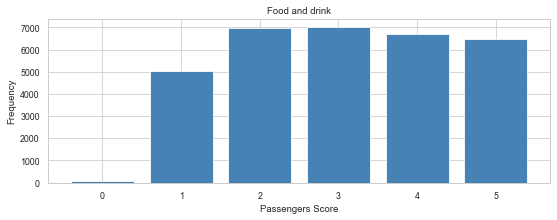

Food and drink: 
 3    7014
2    6980
4    6702
5    6475
1    5026
0      52
Name: Food and drink, dtype: int64


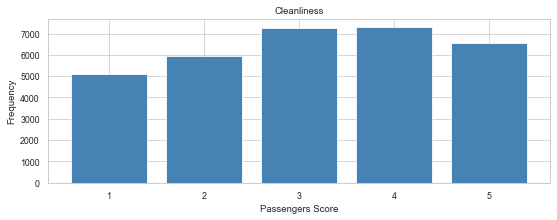

Cleanliness: 
 4    7306
3    7274
5    6575
2    5970
1    5124
Name: Cleanliness, dtype: int64


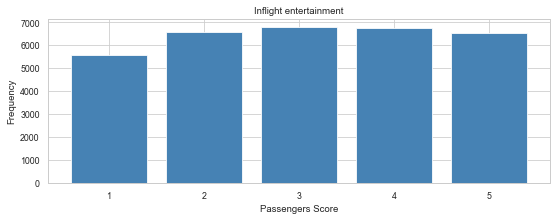

Inflight entertainment: 
 3    6788
4    6754
2    6598
5    6529
1    5580
Name: Inflight entertainment, dtype: int64


In [58]:
eat = ['Food and drink', 'Cleanliness', 'Inflight entertainment']

for c in eat:
    eat_plot(c)

It can be seen that:
- There are 12006 passengers who are not satisfied with eatind and drinking (rating 1 - 2). There are also 52 passengers who do not rate this service (rating 0).
- There are 11904 passengers who are not satisfied with the cleanliness (rating 1 - 2).
- There are 12178 passengers who are not satisfied in in-flight entertainment.

**Conclusion**: There may be a problem with these services.

In [59]:
# for airline's facilities
def flight_plot(variable):
    
    var=df_personal[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values, color = 'steelblue')
    
    plt.xlabel('Passengers Score')
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print('{}: \n {}'.format(variable,var_Value))

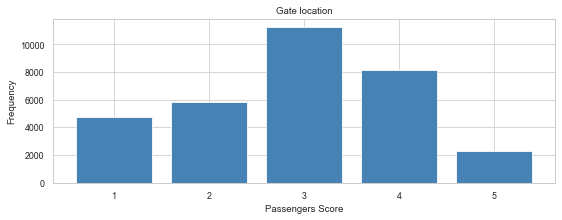

Gate location: 
 3    11235
4     8143
2     5832
1     4755
5     2284
Name: Gate location, dtype: int64


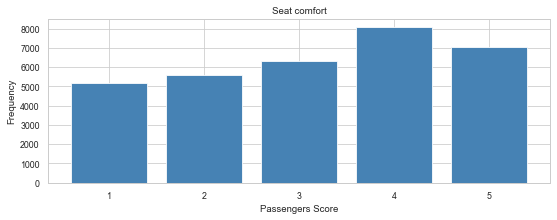

Seat comfort: 
 4    8078
5    7069
3    6334
2    5602
1    5166
Name: Seat comfort, dtype: int64


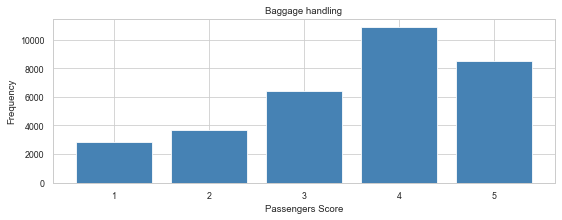

Baggage handling: 
 4    10887
5     8501
3     6380
2     3671
1     2810
Name: Baggage handling, dtype: int64


In [60]:
flight = ['Gate location', 'Seat comfort', 'Baggage handling']

for c in flight:
    flight_plot(c)

It can be seen that:

- There are 12006 passengers who are not satisfied with gate location (rating 1 - 2).
- There are 10769 passengers who are not satisfied with the comfort of the seats (rating 1 - 2).

**Conclusion**: Personal travel passengers is generally neutral or dissatisfied with the flight.

##### Satisfaction of Business Travel

In [61]:
df_business = df[df['Type of Travel'] == 'Business travel']
df_business.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   
7  Female     Loyal Customer   52  Business travel  Business             2035   

   Inflight wifi service  Departure/Arrival time convenient  \
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   
7                      4                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   
7                       4              4               5                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   
7             5                       5                 5                 5   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   
7                 5                4                 5            4   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
1                           1                       6.0   
2                           0                       0.0   
3                          11                       9.0   
4                           0                       0.0   
7                           4                       0.0   

              satisfaction  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  
7                satisfied

In [62]:
# for airline's service
def service_plot(variable):
    
    var=df_business[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values, color = 'steelblue')
    plt.xlabel('Passengers Score')
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print('{}: \n {}'.format(variable,var_Value))

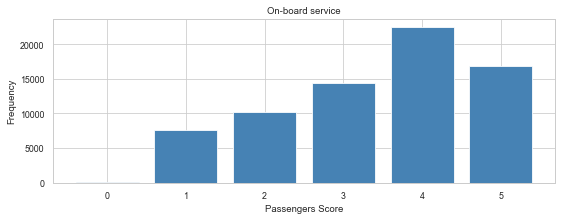

On-board service: 
 4    22505
5    16927
3    14411
2    10168
1     7641
0        3
Name: On-board service, dtype: int64


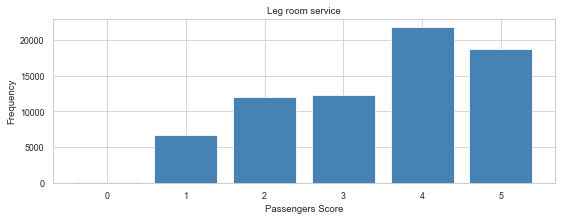

Leg room service: 
 4    21809
5    18814
3    12318
2    11996
1     6646
0       72
Name: Leg room service, dtype: int64


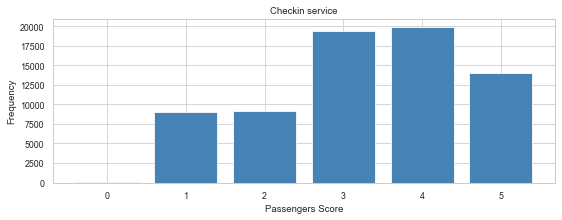

Checkin service: 
 4    19908
3    19470
5    14076
2     9128
1     9072
0        1
Name: Checkin service, dtype: int64


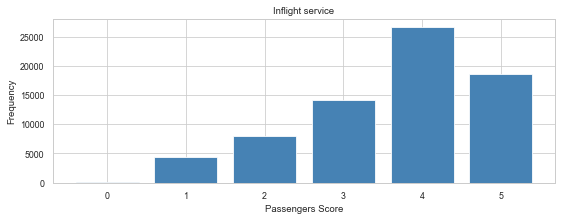

Inflight service: 
 4    26623
5    18635
3    14084
2     7903
1     4407
0        3
Name: Inflight service, dtype: int64


In [63]:
service = ['On-board service', 'Leg room service', 'Checkin service', 'Inflight service']

for c in service:
    service_plot(c)

It can be seen that:
- For **leg room service**, It can be seen that the majority of passengers are satisfied with this service (rating 4 - 5). But, there are 18645 passengers who are not satisfied with this service (rating 1 - 2), and there are 72 passengers who do not rate this service.
- For the others, there are lots of 1 and 2 points in on board service and checkin service.

In [64]:
# for airline's facilities
def eat_plot(variable):
    
    var=df_business[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values, color = 'steelblue')
    
    plt.xlabel('Passengers Score')
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print('{}: \n {}'.format(variable,var_Value))

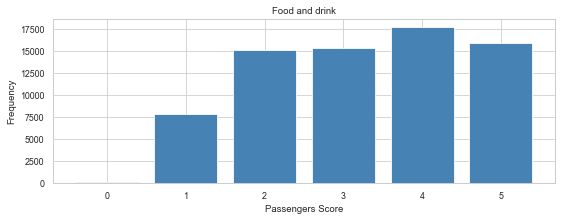

Food and drink: 
 4    17657
5    15838
3    15286
2    15008
1     7811
0       55
Name: Food and drink, dtype: int64


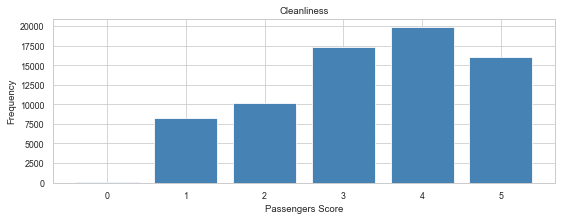

Cleanliness: 
 4    19873
3    17300
5    16114
2    10162
1     8194
0       12
Name: Cleanliness, dtype: int64


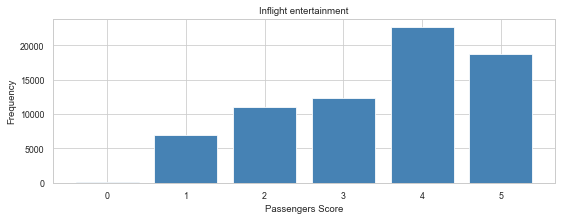

Inflight entertainment: 
 4    22669
5    18684
3    12351
2    11039
1     6898
0       14
Name: Inflight entertainment, dtype: int64


In [65]:
eat = ['Food and drink', 'Cleanliness', 'Inflight entertainment']

for c in eat:
    eat_plot(c)

It can be seen that:
- There are high number of passengers (22819) who are not satisfied with eatind and drinking (rating 1 - 2).
- There are 18356 passengers who are not satisfied with the cleanliness (rating 1 - 2).
- There are 17937 passengers who are not satisfied in in-flight entertainment.

In [66]:
# for airline's facilities
def flight_plot(variable):
    
    var=df_business[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values, color = 'steelblue')
    
    plt.xlabel('Passengers Score')
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print('{}: \n {}'.format(variable,var_Value))

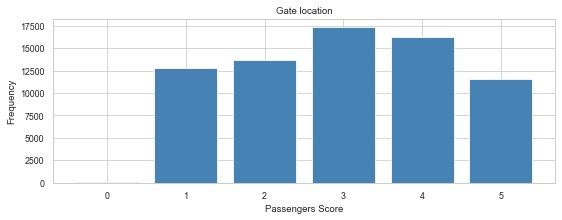

Gate location: 
 3    17342
4    16283
2    13627
1    12807
5    11595
0        1
Name: Gate location, dtype: int64


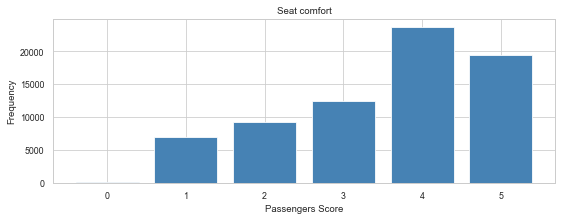

Seat comfort: 
 4    23687
5    19401
3    12362
2     9295
1     6909
0        1
Name: Seat comfort, dtype: int64


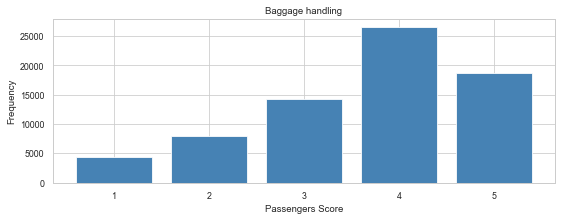

Baggage handling: 
 4    26496
5    18630
3    14252
2     7850
1     4427
Name: Baggage handling, dtype: int64


In [67]:
flight = ['Gate location', 'Seat comfort', 'Baggage handling']

for c in flight:
    flight_plot(c)

It can be seen that:
- There are high number of passengers (26434) who are not satisfied with gate location (rating 1 - 2). There may be a problem with these facilities.

**Conclusion**: Business travel passengers is generally satisfied with the flight.

### Handling Duplication, Missing Values, and Outliers

#### Handling Data Duplication

In [22]:
print('The number of duplication is:', df.duplicated().sum())
# there is no duplication

The number of duplication is: 0


#### Handling Missing Values

In [45]:
print('Missing values status:', df.isnull().values.any())
print('\nThe number of missing values for each columns: \n')
print(df.isnull().sum().sort_values(ascending=False))

Missing values status: True

The number of missing values for each columns: 

Arrival Delay in Minutes             310
Gender                                 0
Seat comfort                           0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Online boarding                        0
Customer Type                          0
Food and drink                         0
Gate location                          0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
satisfaction        

C:\Users\USER KEMENDIKBUD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Density'>

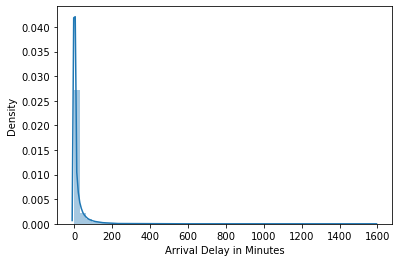

In [13]:
# check the distribution of 'Arrival Delay in Minutes'
sns.distplot(df['Arrival Delay in Minutes'])

# it can be seen that the distribution of 'Arrival Delay in Minutes' is skewed

In [46]:
# impute missing values with median because the data is skewed
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [47]:
print('Missing values status:', df.isnull().values.any())
print('\nThe number of missing values for each columns (after imputation): \n')
print(df.isnull().sum().sort_values(ascending=False))

Missing values status: False

The number of missing values for each columns (after imputation): 

Gender                               0
Seat comfort                         0
Arrival Delay in Minutes             0
Departure Delay in Minutes           0
Cleanliness                          0
Inflight service                     0
Checkin service                      0
Baggage handling                     0
Leg room service                     0
On-board service                     0
Inflight entertainment               0
Online boarding                      0
Customer Type                        0
Food and drink                       0
Gate location                        0
Ease of Online booking               0
Departure/Arrival time convenient    0
Inflight wifi service                0
Flight Distance                      0
Class                                0
Type of Travel                       0
Age                                  0
satisfaction                         0
dtype

#### Outlier Detection

In [48]:
# dataset that only consist numerical variable
numerical_features = df.select_dtypes(exclude=['category'])
numerical_features

Age  Flight Distance  Inflight wifi service  \
0        13              460                      3   
1        25              235                      3   
2        26             1142                      2   
3        25              562                      2   
4        61              214                      3   
...     ...              ...                    ...   
103899   23              192                      2   
103900   49             2347                      4   
103901   30             1995                      1   
103902   22             1000                      1   
103903   27             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
103899                                  1                       2   
103900                                  4                       4   
103901                                  1                       1   
103902                                  1                       1   
103903                                  3                       3   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                   1               5                3             5   
1                   3               1                3             1   
2                   2               5                5             5   
3                   5               2                2             2   
4                   3               4                5             5   
...               ...             ...              ...           ...   
103899              3               2                2             2   
103900              4               2                4             5   
103901              3               4                1             5   
103902              5               1                1             1   
103903              3               1                1             1   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
103899                 4                2                 3            2   
103900                 5                5                 5            4   
103901                 4                5                 5            4   
103902                 1                5           

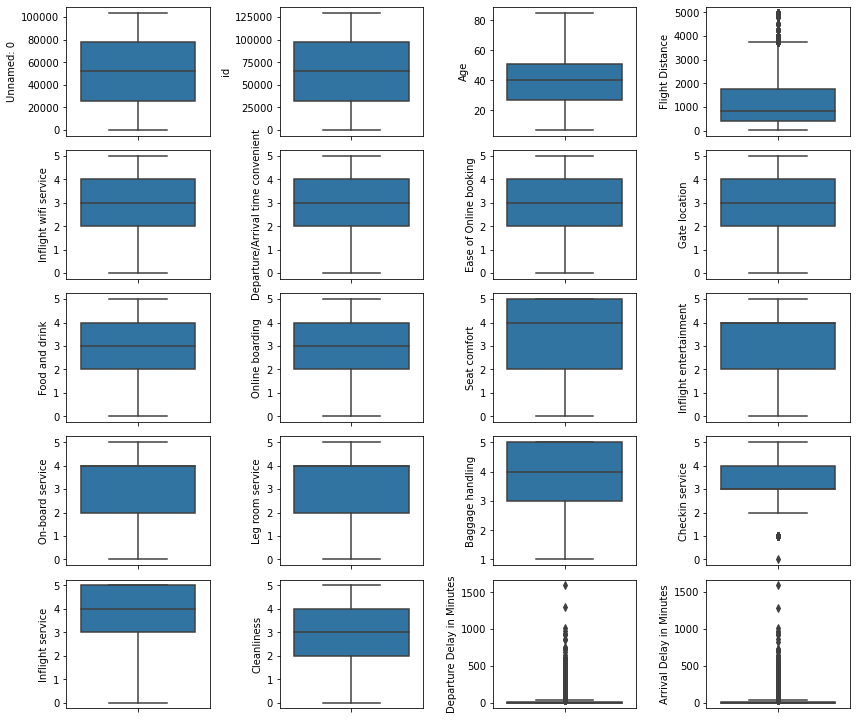

In [17]:
# visualization
fig = plt.figure(figsize=(12,18))

for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

It can be seen that outliers were found in the following variables:
1. `Flight Distance`
2. `Checkin service`
3. `Departure Delay in Minutes`
4. `Arrival Delay in Minutes`

so it is necessary to handle the outliers.

In [49]:
# handling the outliers with IQR
Q1 = (df[['Flight Distance','Checkin service', 'Departure Delay in Minutes','Arrival Delay in Minutes']]).quantile(0.25)
Q3 = (df[['Flight Distance','Checkin service', 'Departure Delay in Minutes','Arrival Delay in Minutes']]).quantile(0.75)
IQR = Q3-Q1

max = Q3 + (1.5*IQR)
min = Q1 - (1.5*IQR)

df['Flight Distance'].mask(df['Flight Distance']>max['Flight Distance'],max['Flight Distance'],inplace=True)
df['Checkin service'].mask(df['Checkin service']<min['Checkin service'],min['Checkin service'],inplace=True)
df['Departure Delay in Minutes'].mask(df['Departure Delay in Minutes']>max['Departure Delay in Minutes'],max['Departure Delay in Minutes'],inplace=True)
df['Arrival Delay in Minutes'].mask(df['Arrival Delay in Minutes']>max['Arrival Delay in Minutes'],max['Arrival Delay in Minutes'],inplace=True)

### Model Building

#### Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
# convert all non-numeric variables to numeric type
for column in df.columns:
    if df[column].dtype == np.number: continue
    # Perform Encoding for each non-numeric variables
    df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\USERKE~1\AppData\Local\Temp/ipykernel_14884/1138740398.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number: continue


In [31]:
df.describe()

Gender  Customer Type            Age  Type of Travel  \
count  103904.000000  103904.000000  103904.000000   103904.000000   
mean        0.492541       0.182678      32.379052        0.310373   
std         0.499947       0.386404      15.113075        0.462649   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.000000      20.000000        0.000000   
50%         0.000000       0.000000      33.000000        0.000000   
75%         1.000000       0.000000      44.000000        1.000000   
max         1.000000       1.000000      74.000000        1.000000   

               Class  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean        0.594135      1186.133927               2.729683   
std         0.620799       988.126724               1.327829   
min         0.000000        31.000000               0.000000   
25%         0.000000       414.000000               2.000000   
50%         1.000000       843.000000               3.000000   
75%         1.000000      1743.000000               4.000000   
max         2.000000      3736.500000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           2.631833         3.366333          3.640428       3.286351   
std            1.180903         1.158642          1.175663       1.312273   
min            0.000000         1.500000          0.000000       0.000000   
25%            2.000000         3.000000          3.000000       2.000000   
50%            3.000000         3.000000          4.000000       3.000000   
75%            4.000000         4.000000          5.000000       4.000000   
max            4.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes   satisfaction  
count               103904.000000             103904.000000  103904.000000  
mean                     7.396299                  7.909493       0.433333

#### Data Splitting

In [53]:
# define x and y variable
x = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# splitting tha data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(83123, 22) (20781, 22)


In [54]:
# normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

C:\Users\USERKE~1\AppData\Local\Temp/ipykernel_14884/913480898.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

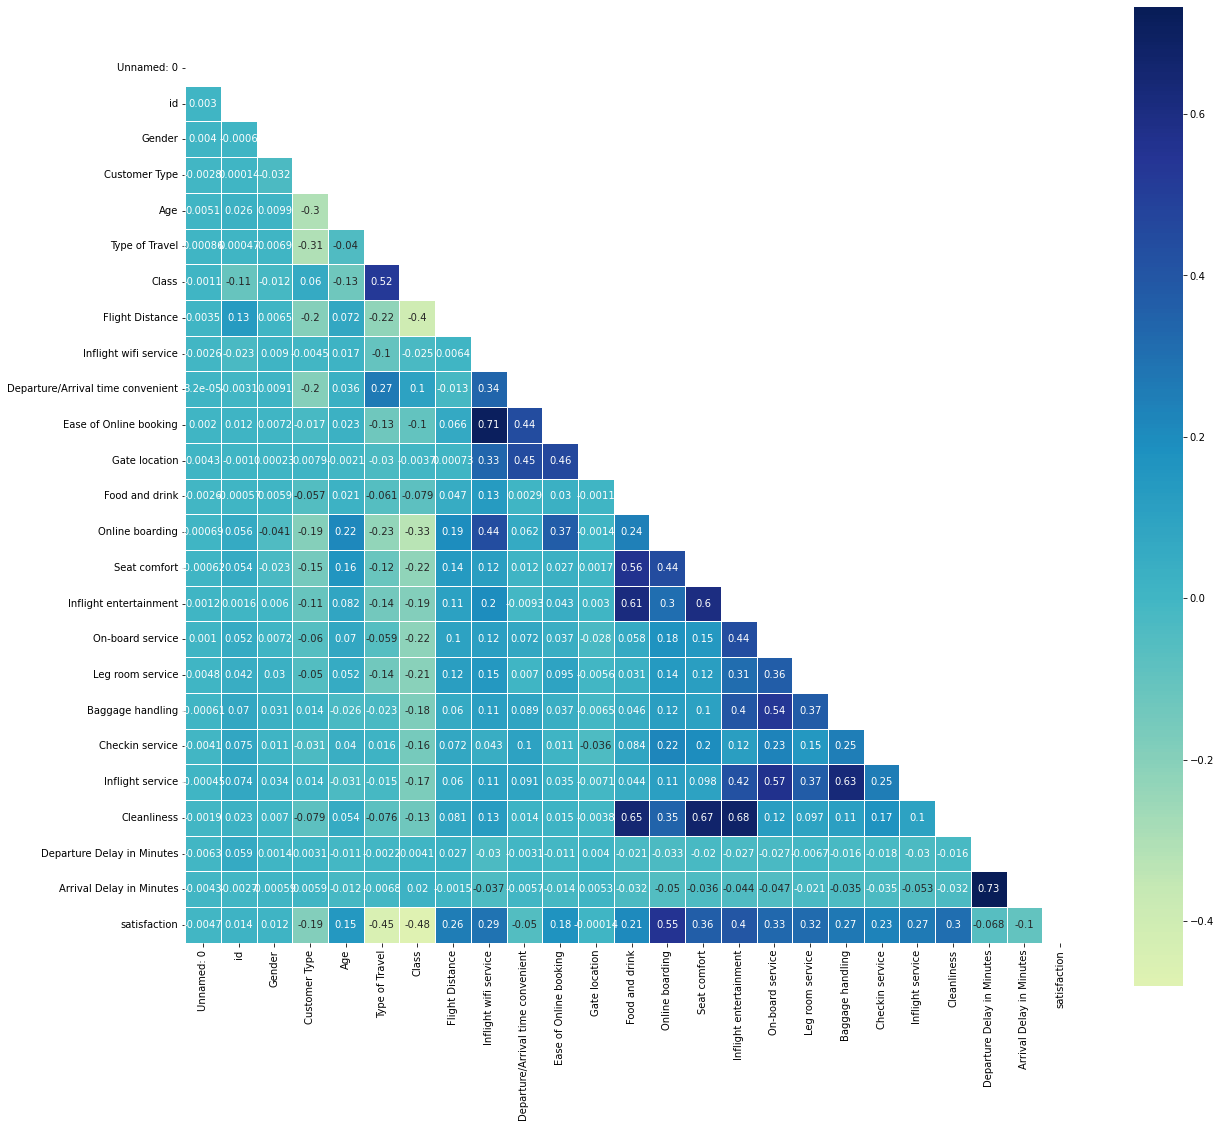

In [22]:
corr = df.corr(method='spearman')

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

It can be seen which features correlate well with customer satisfaction.

1. **Best features**: `Online Boarding`, `Class`, and `Type of Travel`
2. **Worst features**: `Gate location`, `Gender`, and `Departure/Arrival Time Convenient`

#### Model Building

Here are some algorithms that will be tested to determine the best model:
1. Logistic Regression
2. Gaussian Naive Bayes
3. K-Nearest Neighbor
4. Decision Tree
5. Random Forest

##### 1. Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


In [103]:
from sklearn.metrics import confusion_matrix, classification_report

# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     47166
           1       0.87      0.84      0.85     35957

    accuracy                           0.88     83123
   macro avg       0.87      0.87      0.87     83123
weighted avg       0.87      0.88      0.87     83123



In [104]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11713
           1       0.88      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



In [105]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 87.5
Test Accuracy: % 87.74


It can be seen that:
- Logistic regression model gives 87.5% correct results.
- There is 0.24% error margin.

In [106]:
# ROC scores
from sklearn.metrics import roc_auc_score
roc_auc_log = roc_auc_score(y_test, y_test_pred_log)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.8727417274062866


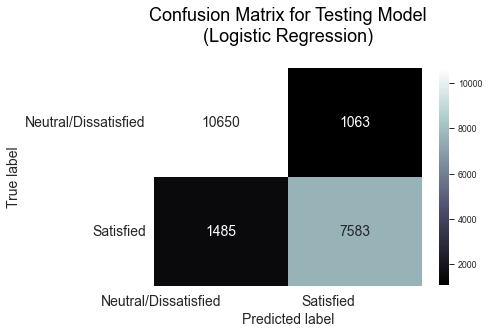

In [107]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('Neutral/Dissatisfied', 'Satisfied'), ('Neutral/Dissatisfied', 'Satisfied'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

##### 2. Gaussian Naive Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB

# train the model
gnb_model = GaussianNB().fit(X_train,y_train)
print(gnb_model)

GaussianNB()


In [109]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

Classification Report Training Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     47166
           1       0.87      0.82      0.84     35957

    accuracy                           0.87     83123
   macro avg       0.87      0.86      0.86     83123
weighted avg       0.87      0.87      0.87     83123



In [110]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Gaussian Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

Classification Report Testing Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11713
           1       0.87      0.82      0.85      9068

    accuracy                           0.87     20781
   macro avg       0.87      0.86      0.87     20781
weighted avg       0.87      0.87      0.87     20781



In [111]:
acc_nb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_nb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nb_train))
print("Test Accuracy: % {}".format(acc_nb_test))

Training Accuracy: % 86.73
Test Accuracy: % 87.01


It can be seen that:
- Gaussian naive bayes model gives 86.73% correct results.
- There is 0.28% error margin.

In [112]:
# ROC scores
roc_auc_gnb = roc_auc_score(y_test, y_test_pred_gnb)
print('ROC AUC:', roc_auc_gnb)

ROC AUC: 0.8646149673425646


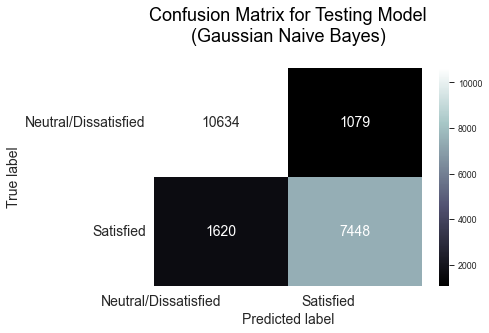

In [113]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('Neutral/Dissatisfied', 'Satisfied'), ('Neutral/Dissatisfied', 'Satisfied'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

##### 3. K-Nearest Neighbor

In [114]:
from sklearn.neighbors import KNeighborsClassifier

# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)

KNeighborsClassifier()


In [115]:
# predit data train
y_train_pred_knn = knn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (K-Neighbors Classifier):')
print(classification_report(y_train, y_train_pred_knn))

Classification Report Training Model (K-Neighbors Classifier):
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     47166
           1       0.97      0.91      0.94     35957

    accuracy                           0.95     83123
   macro avg       0.95      0.94      0.95     83123
weighted avg       0.95      0.95      0.95     83123



In [116]:
# predit data test
y_test_pred_knn = knn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (K-Neighbors Classifier):')
print(classification_report(y_test, y_test_pred_knn))

Classification Report Testing Model (K-Neighbors Classifier):
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     11713
           1       0.95      0.88      0.91      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.92     20781
weighted avg       0.93      0.93      0.93     20781



In [117]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_knn_train))
print("Test Accuracy: % {}".format(acc_knn_test))

Training Accuracy: % 94.74
Test Accuracy: % 92.56


It can be seen that:
- K-nearest neighbor model gives 94.74% correct results.
- There is 2.18% error margin.

In [118]:
# ROC scores
roc_auc_knn = roc_auc_score(y_test, y_test_pred_knn)
print('ROC AUC:', roc_auc_knn)

ROC AUC: 0.91995450878911


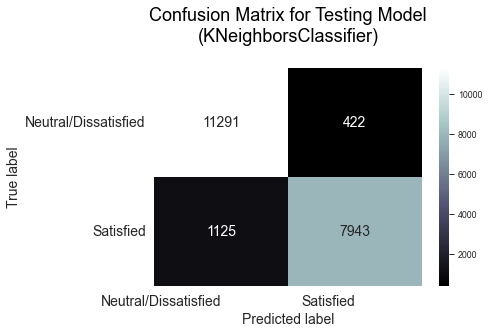

In [119]:
# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('Neutral/Dissatisfied', 'Satisfied'), ('Neutral/Dissatisfied', 'Satisfied'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(KNeighborsClassifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

##### 4. Decision Tree

In [55]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
param_grid = {'max_depth' : np.arange(3,10),
              'min_samples_split' : np.arange(2,10),
              'min_samples_leaf' : np.arange(1,10)}

# create a randomized search CV object
dt = DecisionTreeClassifier()
random_grid_dt = RandomizedSearchCV(
    estimator = dt,
    param_distributions = param_grid,
    scoring = 'roc_auc',
    random_state=0,
    cv = 10)
print(random_grid_dt)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=0, scoring='roc_auc')


In [56]:
random_grid_dt.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=0, scoring='roc_auc')

In [57]:
random_grid_dt.best_params_

{'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 9}

In [58]:
random_grid_dt.best_score_

0.985596191053328

In [59]:
# train the model
dt_model = DecisionTreeClassifier(max_depth=9,min_samples_leaf=6,min_samples_split=6).fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=6, min_samples_split=6)


In [47]:
from sklearn.metrics import confusion_matrix, classification_report

# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     47166
           1       0.95      0.92      0.93     35957

    accuracy                           0.94     83123
   macro avg       0.94      0.94      0.94     83123
weighted avg       0.94      0.94      0.94     83123



In [48]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11713
           1       0.94      0.92      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



In [49]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 94.24
Test Accuracy: % 93.95


It can be seen that:
- Decision tree model gives 94.24% correct results.
- There is 0.29% error margin.

In [50]:
# ROC scores
roc_auc_dt = roc_auc_score(y_test, y_test_pred_dt)
print('ROC AUC:', roc_auc_dt)

ROC AUC: 0.9368608697554823


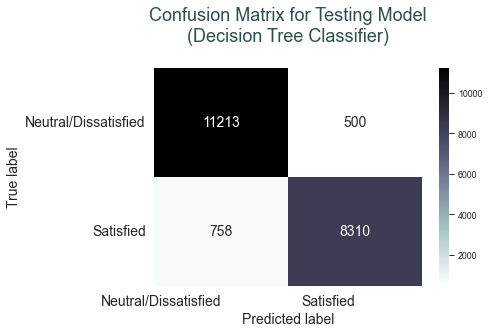

In [51]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('Neutral/Dissatisfied', 'Satisfied'), ('Neutral/Dissatisfied', 'Satisfied'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='darkslategrey')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [28]:
!pip install graphviz

In [30]:
! pip install pydotplus

In [29]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.990149 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.990149 to fit



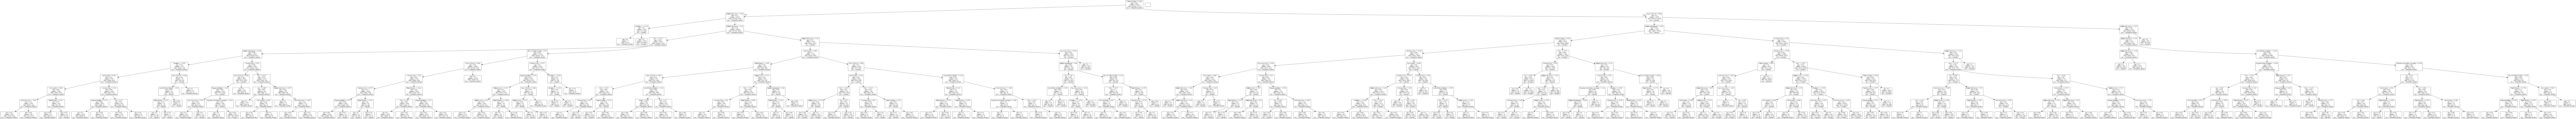

In [69]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

# lets include only the best features
feature_cols= ["Gender", "Customer Type","Age", "Type of Travel", "Class", 
               "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient", 
               "Ease of Online booking", 	"Gate location", 	"Food and drink", "Online boarding",
               "Seat comfort","Inflight entertainment","On-board service",
               "Leg room service","Baggage handling","Checkin service",
               "Inflight service","Cleanliness","Departure Delay in Minutes","Arrival Delay in Minutes"]
dot_data = tree.export_graphviz(dt_model, out_file=None, feature_names = feature_cols, class_names = ['Neutral/Dissatisfied', 'Satisfied'])
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('dt.png')
Image(graph.create_png())

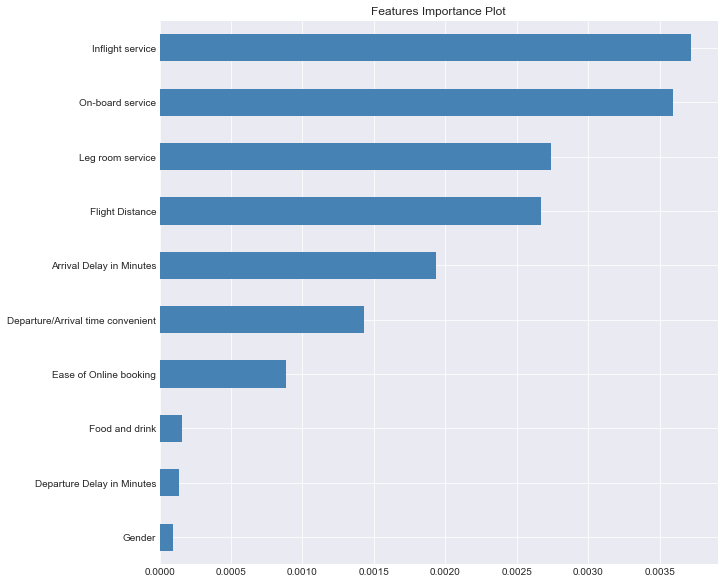

In [80]:
# top 10 feature importance plot
importances_dt = pd.Series(data=dt_model.feature_importances_,
                        index= x.columns)
importances_dt = importances_dt.sort_values(ascending=True).head(10)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
importances_dt.plot(kind='barh', color='steelblue')
plt.title('Features Importance Plot')
plt.show()

##### 5. Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


In [132]:
# predict data train
y_train_pred_dt = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47166
           1       1.00      1.00      1.00     35957

    accuracy                           1.00     83123
   macro avg       1.00      1.00      1.00     83123
weighted avg       1.00      1.00      1.00     83123



In [133]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [134]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 96.22


It can be seen that:
- Random forest model gives 100% correct results.
- There is 3.78% error margin.

In [135]:
# ROC scores
roc_auc_rf = roc_auc_score(y_test, y_test_pred_rf)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.9596615576606075


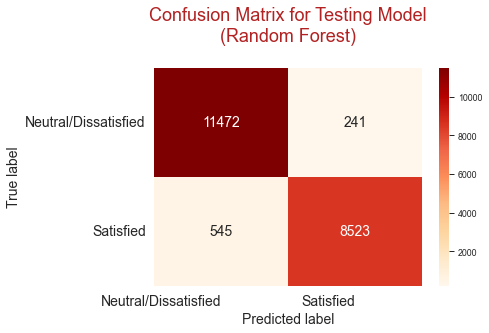

In [136]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('Neutral/Dissatisfied', 'Satisfied'), ('Neutral/Dissatisfied', 'Satisfied'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='OrRd')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='firebrick')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.123611 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.123611 to fit



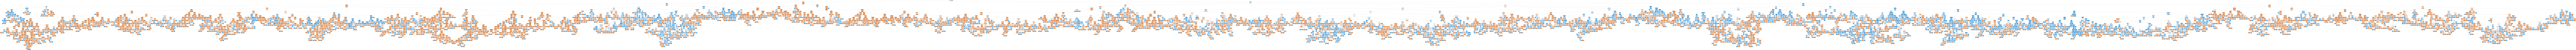

In [84]:
feature_cols= ["Gender", "Customer Type","Age", "Type of Travel", "Class", 
               "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient", 
               "Ease of Online booking", 	"Gate location", 	"Food and drink", "Online boarding",
               "Seat comfort","Inflight entertainment","On-board service",
               "Leg room service","Baggage handling","Checkin service",
               "Inflight service","Cleanliness","Departure Delay in Minutes","Arrival Delay in Minutes"]

dot_data_rf = tree.export_graphviz(rf_model.estimators_[0], out_file=None, feature_names = feature_cols, class_names = ['Neutral/Dissatisfied', 'Satisfied'],
                                filled=True)
graph = pydotplus.graph_from_dot_data(dot_data_rf)  
graph.write_png('rf.png')
Image(graph.create_png())

Feature ranking:
1. feature 11 (0.162241)
2. feature 6 (0.141779)
3. feature 3 (0.110874)
4. feature 4 (0.092591)
5. feature 12 (0.050936)
6. feature 13 (0.050304)
7. feature 15 (0.040134)
8. feature 5 (0.039252)
9. feature 8 (0.036570)
10. feature 14 (0.035904)
11. feature 2 (0.034857)
12. feature 1 (0.034544)
13. feature 18 (0.025055)
14. feature 19 (0.024748)
15. feature 16 (0.024545)
16. feature 17 (0.024521)
17. feature 9 (0.016698)
18. feature 7 (0.016264)
19. feature 10 (0.013194)
20. feature 21 (0.010937)
21. feature 20 (0.009161)
22. feature 0 (0.004890)


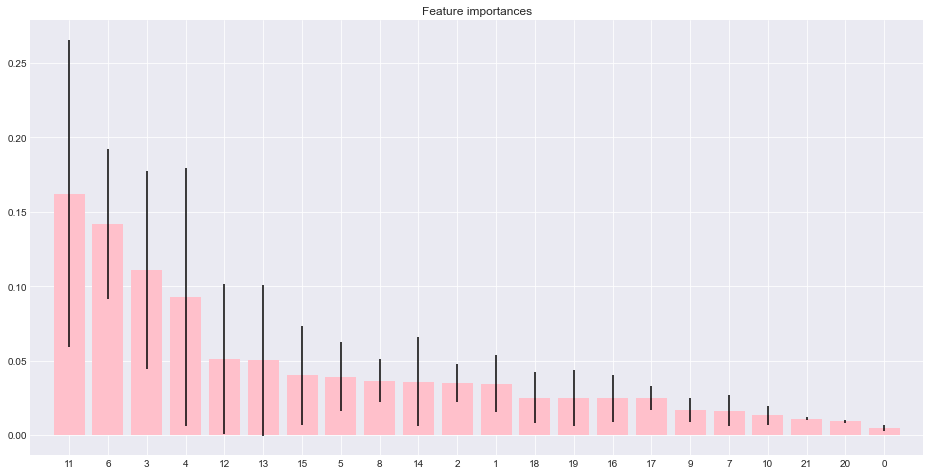

In [95]:
# varible importance
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# print the feature ranking
print("Feature ranking:")
for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# plot the feature importances of the forest
plt.figure(figsize=(16,8))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],color="pink", yerr=std[indices],align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

### Model Comparison

#### Model based on **Accuracy**

| Algorithm | Training Data Accuracy | Testing Data Accuracy |
| :------: |:------:|:------:|
| Logistic Regression | 87.5% | 87.74% |
| Gaussian Naive Bayes |86.73%| 87.01% |
| K-Nearest Neighbor Classifier | 94.74% | 92.56% |
| Decision Tree Classifier | 94.24% | 93.95% |
| Random Forest Classifier | 100% | 96.22% |

- The accuracy of the `data test` and `data train` predictions in `decision tree` model have values that are not much different, it can be said that the model is very good and there is no underfitting or overfitting.
- The `decision tree` model was chosen because this modal produces high accuracy values & has a small error margin, and also can provide insightful information.

Why was the `random forest` model not chosen? because this model produces a very complex `tree` that is difficult to interpret, and and has a larger margin of error than the `decision tree` model. And, so is the `k-nearest neighbor` model.

#### Model based on **ROC** Score:

In [96]:
roc_scores = [roc_auc_log, roc_auc_gnb, roc_auc_knn, roc_auc_dt, roc_auc_rf]
model_scores = pd.DataFrame(auc_scores, index=['Logistic Regression','Gaussian Naive Bayes','K-Neighbors','Decision Tree', 'Random Forest'], columns=['AUC'])
model_scores.head()

NameError: name 'roc_auc_log' is not defined

### Conclusion

Based on accuracy and ROC scores, the `Random Forest` and `K-Nearest Neighbor` models are superior to other models. However, because these models produce a very complex tree that is difficult to interpret and have a larger margin of error than the decision tree model, so the `Decision Tree` model was chosen. This is because the difference in the accuracy values does not have a significant difference, and can provide insightful interpretations.

### Recommendation

1. Improving in-flight wifi services such as wifi connectivity that is easily accessible by customer devices, security in accessing wifi, and increasing network speed.
2. Improving entertainment services, one of which is by adding various tv shows, games for children's entertainment, and audio programs to listen to various types of music.
3. To reduce the density of prospective passengers at check-in counters during peak hours, airlines can add self-check-in counters and conduct socialization to airline customers to increase the use of self-check-in.
4. Improve server self check-in (web, mobile) and online boarding services to provide time efficiency for customers who will travel.